<a href="https://colab.research.google.com/github/inf032/introducaoML/blob/master/99.Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics  import mean_squared_error
from sklearn.dummy import DummyRegressor


dataFrame = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/FuelConsumption2022.csv')

preditoras = ['Make', 'Vehicle Class', 'Engine Size (L)', 'Cylinders', 'Transmission', 'Fuel Type']
dependente = 'Fuel Consumption Comb (L/100 km)'

X = dataFrame[preditoras] 
y = dataFrame[dependente] 

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = pd.get_dummies(X_train, drop_first=True)

gbr = GradientBoostingRegressor().fit(X_train, y_train)
dr = DummyRegressor(strategy='median').fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(gbr.predict(X_test), y_test))
rmse_dummy = np.sqrt(mean_squared_error(dr.predict(X_test), y_test))

print(rmse, rmse / y_test.mean() * 100)
print(rmse_dummy, rmse_dummy / y_test.mean() * 100)



1.0286479131825879 9.374288728618046
2.9277956177792155 26.681628483091345


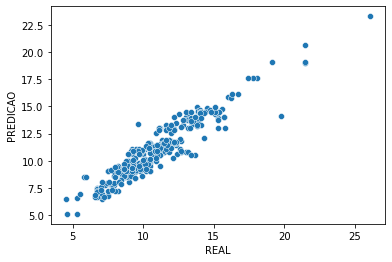

In [55]:
import seaborn as sns

dataError = pd.DataFrame()
dataError['REAL'] = y_test
dataError['PREDICAO'] = gbr.predict(X_test)
dataError



sns.scatterplot(data=dataError, x="REAL", y="PREDICAO")